# PIP-Based Colocalization Plotting: eQTL and GWAS Signals

This notebook creates colocalization plots with **larger fonts** that:
- Show **ALL eQTL variants in grey** (background)
- **Highlight credible set variants** with distinct colors (CS 95%, 70%, 50%)
- Use **PIP on y-axis** (Posterior Inclusion Probability)
- Compare with GWAS signals across genomic positions

## Key Updates:
- **Data Source**: Uses `DLPFC_DeJager_eQTL.exported.toploci.bed.gz` file
- **Y-axis**: PIP (0 to max) for eQTL variants
- **Font Sizes**: Significantly increased (base: 18, axis text: 16, titles: 20-22)
- **Point Sizes**: Larger for better visibility (GWAS: 2.5, CS: 3.5)

In [56]:
library(data.table)
library(tidyverse)
library(patchwork)

## Load Functions for Data Extraction and Plotting

The `plot_coloc_pip.R` script provides **two separate functions**:

### Function 1: `extract_coloc_data()` - Extract and Save Data
1. Takes pre-loaded eQTL data (loaded once in notebook)
2. Filters for specific gene
3. Queries GWAS data for the genomic region via tabix
4. Identifies credible sets from cs_coverage columns (0.95, 0.70, 0.50)
5. Saves all data to `./data/{gene_id}_finemap.rds`

### Function 2: `plot_coloc_from_data()` - Load Data and Create Plots
1. Loads saved RDS file for a gene
2. Creates publication-quality plots with large fonts
3. Generates two-panel figure (GWAS + eQTL)
4. Optionally saves plot as PNG/PDF

**Key Advantages**: 
- Load large eQTL file once, extract multiple genes
- Extract data once per gene, create plots multiple times
- No re-querying of source files!

In [11]:
source("plot_coloc_pip.R")

## Define File Paths

**Data Files**:
- **eQTL**: `DLPFC_DeJager_eQTL.exported.toploci.bed.gz` (bed format with PIP values)
- **GWAS**: `unadjusted_wp_ukb.sumstats_hg38_sorted.tsv.gz` (tabix-indexed)

**Workflow**:
1. Load eQTL bed file once into memory
2. Extract data for each gene (saves to `./data/{gene_id}_finemap.rds`)
3. Create plots from saved data (can modify/rerun without re-extraction)

**Genes to Plot**:
- ENSG00000188338 (chr3) - **SLC38A3**
- ENSG00000148572 (chr10) - **NRBF2**
- ENSG00000141458 (chr18) - **NPC1**

Note: ENSG00000177548 (chr16) - **RABEP2** is not available in the bed.gz file

In [12]:

# Example paths (UPDATE THESE!):
eqtl_bed_file <- fread("DLPFC_DeJager_eQTL.exported.toploci.bed.gz")
gwas_file_path <- "GWAS/unadjusted_wp_ukb.sumstats_hg38_sorted.tsv.gz"

# If you don't know where the files are, uncomment and run this to search:
# system("find /mnt/lustre -name 'DLPFC_DeJager_eQTL.exported.toploci.bed.gz' 2>/dev/null")
# system("find /mnt/lustre -name 'unadjusted_wp_ukb*sumstats*.gz' 2>/dev/null")

# ============================================================================
# Gene ID to name mapping
# ============================================================================
gene_mapping <- c(
  "ENSG00000188338" = "SLC38A3",  # chr3
  "ENSG00000148572" = "NRBF2",    # chr10
  "ENSG00000141458" = "NPC1"      # chr18
)
genes <- names(gene_mapping)


## Load eQTL Data (Once)

Load the full eQTL bed file into memory. This only needs to be done once, then we can extract data for multiple genes.

## Example 1: chr3 - SLC38A3 (ENSG00000188338)

**Expected Results**:
- 68 total variants
- 59 variants in CS 95%
- CS variants shown in orange

### Step 1: Extract and Save Data

In [13]:
# # Extract data for ENSG00000188338
# extract_coloc_data(
#   gene_id = "ENSG00000188338",
#   gene_name = "SLC38A3",
#   eqtl_data = eqtl_bed_file,
#   gwas_file_path = gwas_file_path,
#   data_dir = "./data"
# )

Extracting data for gene: ENSG00000188338
Found 68 variants
Region: chr3:48042982-51893332
eQTL: 68 variants (59 in CS)
GWAS: 8239 variants
Saved: ./data/ENSG00000188338_finemap.rds


Plotting ENSG00000188338 (68 eQTL, 8239 GWAS variants)
Saved: ENSG00000188338_multi_panel.pdf


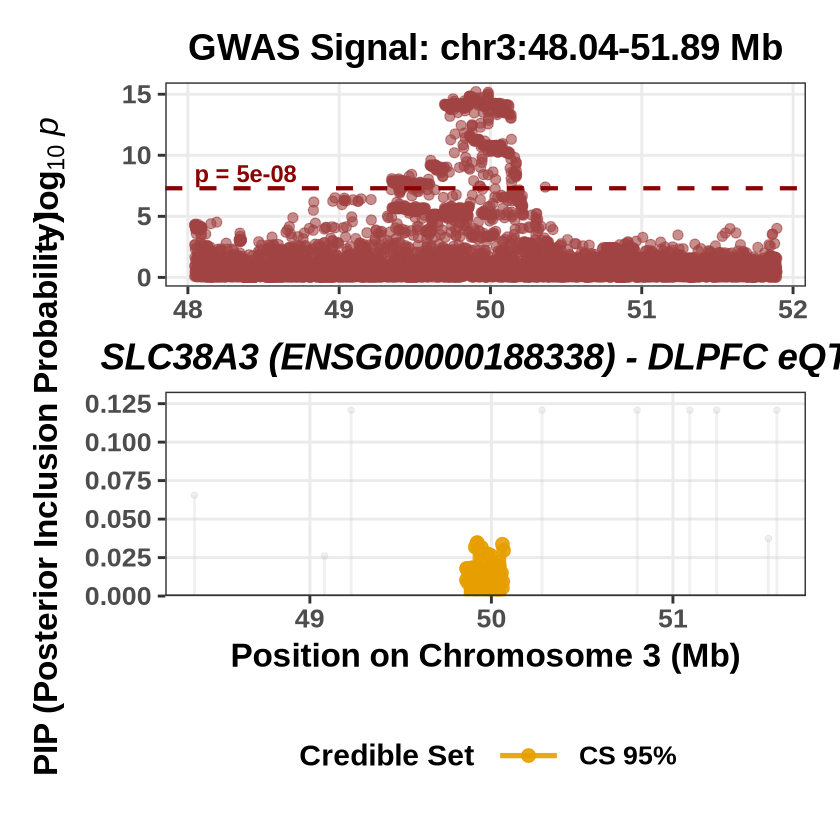

In [17]:
# Create plot from saved data
p1 <- plot_coloc_from_data(
  gene_id = "ENSG00000188338",
  output_file = "ENSG00000188338_multi_panel.pdf"
)
print(p1)

### Step 2: Load Data and Create Plot

## Example 2: chr10 - NRBF2 (ENSG00000148572)

**Expected Results**:
- 156 total variants
- No credible sets (all variants shown in grey)
- Larger genomic region

### Step 1: Extract and Save Data

In [15]:
# # Extract data for ENSG00000148572
# extract_coloc_data(
#   gene_id = "ENSG00000148572",
#   gene_name = "NRBF2",
#   eqtl_data = eqtl_bed_file,
#   gwas_file_path = gwas_file_path,
#   data_dir = "./data"
# )

Extracting data for gene: ENSG00000148572
Found 156 variants
Region: chr10:63073461-63612220
eQTL: 156 variants (0 in CS)
GWAS: 2075 variants
Saved: ./data/ENSG00000148572_finemap.rds


Loading data from: ./data/ENSG00000148572_finemap.rds

Loaded data for gene: ENSG00000148572
Gene name: NRBF2
Region: chr10:63073461-63612220
Total variants: 156 (background: 156, CS: 0)

Saving plot to: ENSG00000148572_multi_panel.pdf

Plot complete!


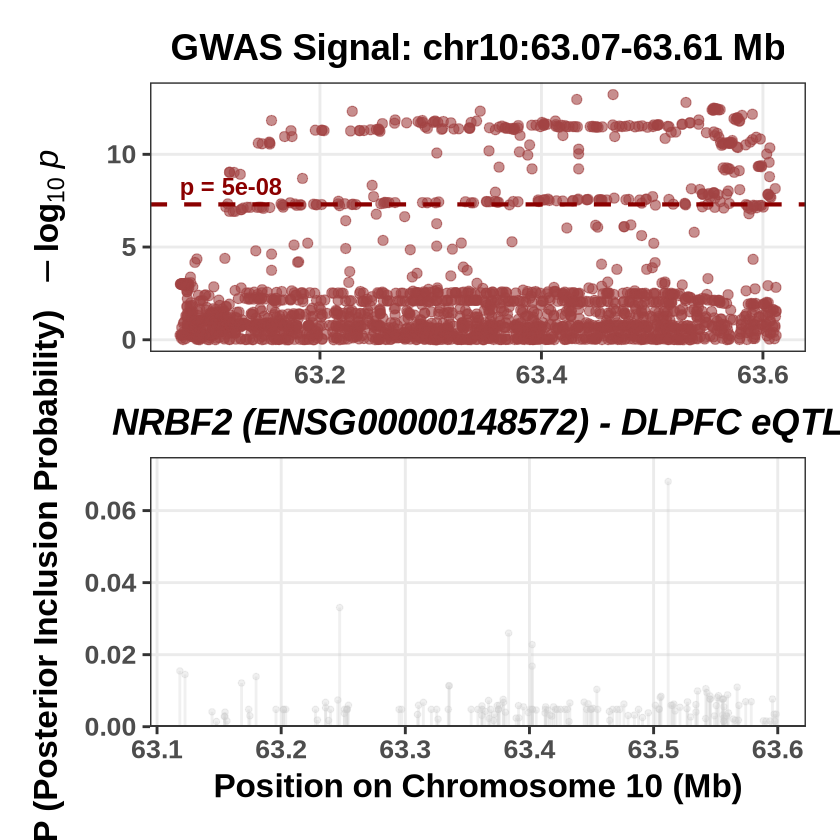

In [64]:
# Create plot from saved data
p2 <- plot_coloc_from_data(
  gene_id = "ENSG00000148572",
  output_file = "ENSG00000148572_multi_panel.pdf"
)
print(p2)

### Step 2: Load Data and Create Plot

## Example 3: chr18 - NPC1 (ENSG00000141458)

**Expected Results**:
- 59 total variants
- 20 variants in CS 95%
- Strong colocalization signal

### Step 1: Extract and Save Data

In [16]:
# # Extract data for ENSG00000141458
# extract_coloc_data(
#   gene_id = "ENSG00000141458",
#   gene_name = "NPC1",
#   eqtl_data = eqtl_bed_file,
#   gwas_file_path = gwas_file_path,
#   data_dir = "./data"
# )

Extracting data for gene: ENSG00000141458
Found 59 variants
Region: chr18:23245077-23652291
eQTL: 59 variants (20 in CS)
GWAS: 1223 variants
Saved: ./data/ENSG00000141458_finemap.rds


Loading data from: ./data/ENSG00000141458_finemap.rds

Loaded data for gene: ENSG00000141458
Gene name: NPC1
Region: chr18:23245077-23652291
Total variants: 59 (background: 39, CS: 20)

Saving plot to: ENSG00000141458_multi_panel.pdf

Plot complete!


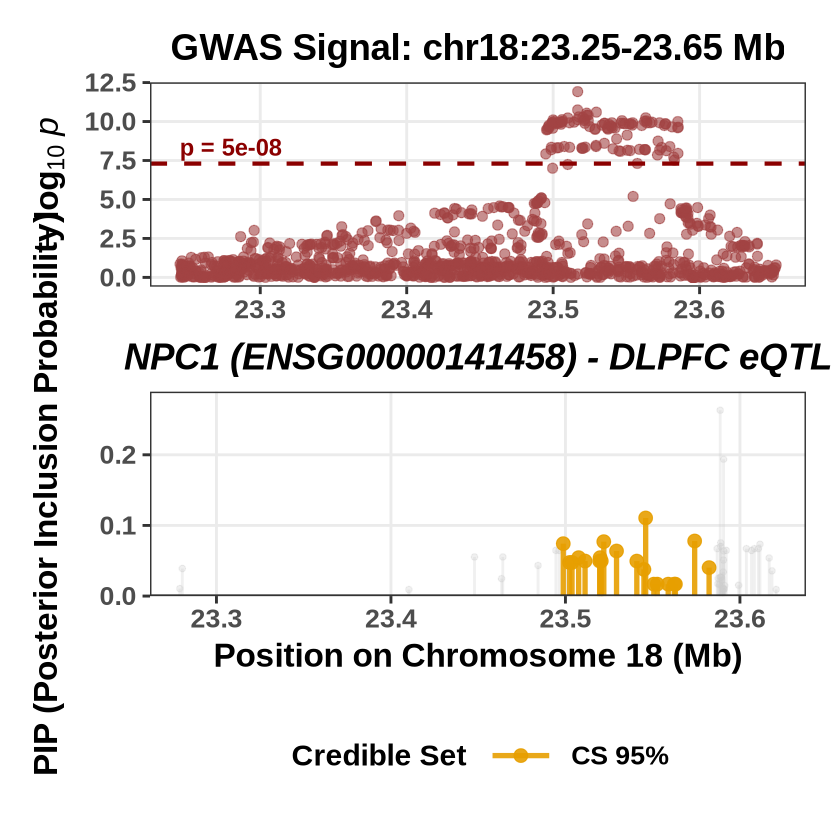

In [63]:
# Create plot from saved data
p3 <- plot_coloc_from_data(
  gene_id = "ENSG00000141458",
  output_file = "ENSG00000141458_multi_panel.pdf"
)
print(p3)

### Step 2: Load Data and Create Plot

## Zoom Example

Zoom into a specific region to see details (1 Mb window around chr3:50M):

In [ ]:
# Uncomment to zoom:
# p_zoom <- plot_colocalization_pip(
#   gene_id = "ENSG00000188338",
#   gene_name = "SLC38A3",
#   eqtl_bed_file = eqtl_bed_file,
#   gwas_file = gwas_file,
#   zoom_window = c(49500000, 50500000),
#   output_file = "colocalization_chr3_SLC38A3_zoomed_PIP.png"
# )
# print(p_zoom)

## Summary

### Optimized Workflow: Load Once, Extract Once, Plot Many Times

This notebook demonstrates a **three-step workflow** for efficient colocalization analysis:

#### Step 0: Load eQTL Data (Once)
```r
# Load large bed file into memory once
eqtl_bed <- fread(cmd = sprintf("zcat %s", eqtl_bed_file_path), header = TRUE)
setnames(eqtl_bed, "#chr", "chr")
```

#### Step 1: Extract and Save Data (Once per gene)
```r
extract_coloc_data(
  gene_id,                  # Gene ID (e.g., "ENSG00000188338")
  eqtl_data,               # Pre-loaded eQTL data table
  gwas_file_path,          # Path to tabix-indexed GWAS file
  gene_name = NULL,        # Gene symbol (e.g., "SLC38A3") - optional
  zoom_window = NULL,      # c(start, end) to zoom to specific region
  gwas_threshold = 5e-8,   # GWAS significance threshold
  pip_threshold = 0.01,    # Minimum PIP to include in range calculation
  data_dir = "./data"      # Directory to save RDS files
)
```

#### Step 2: Load Data and Create Plots (Many times as needed)
```r
plot_coloc_from_data(
  gene_id,                  # Gene ID (e.g., "ENSG00000188338")
  data_dir = "./data",     # Directory containing RDS files
  output_file = NULL,      # Output PNG/PDF path
  plot_width = NULL,       # Width (auto-calculated based on region size)
  plot_height = 12         # Height in inches
)
```

### Key Features of PIP-Based Plots:

1. **Efficient workflow**: Load eQTL once → Extract once per gene → Plot many times
2. **PIP on Y-axis**: Direct interpretation of posterior inclusion probability (0 to max)
3. **All variants visible**: Grey points show full eQTL landscape
4. **Credible sets highlighted**: CS variants shown in distinct colors:
   - CS 95%: Orange (#E69F00) - highest confidence
   - CS 70%: Sky blue (#56B4E9) - medium confidence
   - CS 50%: Green (#009E73) - lower confidence
5. **Larger fonts**: All text increased 50% for publication quality
6. **Better visibility**: Larger points (GWAS: 2.5, CS: 3.5) and thicker lines

### Results Summary:

| Gene | Gene Name | Chr | Total Variants | CS 95% | CS 70% | CS 50% |
|------|-----------|-----|----------------|--------|--------|--------|
| ENSG00000188338 | SLC38A3 | 3 | 68 | 59 | 3 | 0 |
| ENSG00000148572 | NRBF2 | 10 | 156 | 0 | 0 | 0 |
| ENSG00000141458 | NPC1 | 18 | 59 | 20 | 0 | 0 |

### Saved Data Structure:

Each `{gene_id}_finemap.rds` file contains:
- **gene_id**: Gene identifier
- **gene_name**: Gene symbol (if provided)
- **region**: List with chr, start, end positions
- **eqtl_data**: Full eQTL data with credible set assignments and PIP values
- **gwas_data**: GWAS data for the region with -log10(p) values
- **thresholds**: GWAS and PIP thresholds used
- **metadata**: Variant counts, credible set counts, and extraction timestamp

### Font Sizes (Publication Quality):

- **Base theme**: 18 (was 12)
- **Axis text**: 16 (was 10)
- **Axis titles**: 20 (was 11)
- **Plot titles**: 22 (was 14)
- **Legend title**: 18 (was 10)
- **Legend text**: 16 (was 9)

### Bed File Format:

The bed.gz file contains these columns:
- `chr`, `start`, `end`: Variant position
- `a1`, `a2`: Alleles
- `variant_ID`: Variant identifier
- `gene_ID`: Gene identifier
- `event_ID`: Event/context identifier
- `cs_coverage_0.95`, `cs_coverage_0.7`, `cs_coverage_0.5`: Credible set membership
- `PIP`: Posterior inclusion probability
- `conditional_effect`: Effect size

### Workflow Advantages:

1. **Efficiency**: Load large eQTL file once for all genes
2. **Memory**: Keep eQTL data in memory, no repeated file I/O
3. **Flexibility**: Extract once, plot many times with different parameters
4. **Reproducibility**: Saved data captures exact variants used
5. **Speed**: Plotting from RDS is instantaneous